# TAREA I - SEP I/A
<div style="text-align: justify;">

## 0. Esquema De Arquitectura Del Proyecto
Se presenta un breve esquema realizado en la aplicación Drawio que resume a grandes rasgos la forma de operación en que se realiza el estudio y proyecto presentado en este informe. En el que dos estudiantes pueden intercambiar conocimiento a través de la plataforma GitHub.

<div style="text-align: center;">
  <img src="IMAGENES/Esquema_Proyecto.PNG" alt="Descripción de la imagen" width="500"/>
</div>

## 1. Estudio De Ingeniería

### I. Terminología
* **SEN:** Sistema Eléctrico Nacional.
* **ST:** Sistema De Transmisión.
* **CC:** Centro de Control de un Coordinado.

### II. Límites Admisibles de Operación
En base a lo mencionado por la "Norma Técnica de Seguridad y Calidad de Servicio" [1], se definen a continuación los límites admisibles de operación para el estudio.

**A) Estándares de Instalaciones del SEN Para Estado Normal, Estado De Alerta y Estado de Emergencia.**

**[Artículo 5-19]** El SI deberá operar en Estado Normal con todos los elementos e instalaciones del ST y compensación de potencia reactiva disponibles, y suficientes márgenes y reserva de potencia reactiva en las unidades generadoras, compensadores estáticos y sincrónicos, para lo cual el Coordinador y los CC, según corresponda, deberán controlar que la magnitud de la tensión en las barras del SI esté comprendida entre:
* 0.97 y 1.03 pu, para instalaciones del ST con tensión nominal igual o superior a 500 [kV].
* 0.95 y 1.05 pu, para instalaciones del ST con tensión nominal igual o superior a 200 [kV] e inferior a 500 [kV].
* 0.93 y 1.07 pu para instalaciones del ST con tensión nominal inferior a 200 [kV].

**[Artículo 5-23]** En Estado de Alerta el Coordinador y los CC deberán controlar que la magnitud de la tensión en
las barras del SI esté comprendida entre:
* 0.95 y 1.05 pu, para instalaciones del Sistema de Transmisión con tensión nominal igual o superior a 500 [kV], siempre que el límite superior no exceda la tensión máxima de servicio de los equipos.
* 0.93 y 1.07 pu, para instalaciones del Sistema de Transmisión con tensión nominal igual o superior a 200 [kV] e inferior a 500 [kV], siempre que el límite superior no exceda la tensión máxima de servicio de los equipos.
* 0.90 y 1.10 pu, para instalaciones del Sistema de Transmisión con tensión nominal inferior a 200 [kV], siempre que el límite superior no exceda la tensión máxima de servicio de los equipos.

**[Artículo 5-47]** En Estado de Emergencia el Coordinador y los CC deberán controlar que la magnitud de la tensión
en las barras del SI esté comprendida entre:
* 0.93 y 1.05 pu, para instalaciones del Sistema de Transmisión con tensión nominal igual o superior a 500 [kV], siempre que el límite superior no exceda la tensión máxima de servicio de los equipos.
* 0.90 y 1.10 por unidad, para instalaciones del Sistema de Transmisión con tensión nominal igual o superior a 200 [kV] e inferior a 500 [kV], siempre que el límite superior no exceda la tensión máxima de servicio de los equipos.
* 0.90 y 1.10 por unidad, para instalaciones del Sistema de Transmisión con tensión nominal inferior a 200 [kV], siempre que el límite superior no exceda la tensión máxima de servicio de los equipos.

### III. Tipos de Modelados De Líneas
En general, para la modelación de líneas de transmisión existen dos enfoques: en primer lugar se tiene el modelamiento a través de **parámetros concentrados**, en el que la línea se modela como una serie de componentes concentrados distribuidos a lo largo de su longitud, basándose en la simplificación de la línea como un circuito equivalente, donde cada componente representa una característica eléctrica específica de la línea. Mientras que por otro lado, el segundo enfoque involucra el modelamiento de líneas a través de **parámetros distribuidos**, en el que la línea se modela como un circuito distribuido, y por lo tanto, donde los parámetros eléctricos varían continuamente a lo largo de la longitud de la línea. De manera que en lugar de utilizar componentes discretos (RLC), se utilizan funciones de distribución para representar la variación continua de estos parámetros.

Así entonces, mientras el modelado a través de **parámetros concentrados** es útil para análisis de circuitos de corriente alterna (AC) y para aplicaciones donde la longitud de la línea es relativamente corta en comparación con la longitud de onda de la señal, el modelado a través de **parámetros distribuidos** representa un enfoque mucho más preciso para modelar líneas de transmisión largas o para frecuencias más altas donde los efectos de distribución son significativos.

Respecto a la librería escogida para este estudio, se debe señalar que corresponde a la librería **PandaPower**. La cual trabaja directamente el modelado de líneas a través del uso de _parámetros concentrados_.
</div>

## 2. MODELO A

En base a la información suministrada para el **Sistema A** y mostrada en la figura se plantea el esquema con Panda Power. Y se realiza el flujo de carga respectivo para la carga que cambia en el rango $\pm 50\%$ de la potencia indicada.

<div style="text-align: center;">
  <img src="IMAGENES/MODELO_A.PNG" alt="Descripción de la imagen" width="200"/>
</div>

**OBSERVACIÓN:** Puesto que la carga posee un rango de operación, se calcula previamente este rango de la siguiente manera:

  $$Rango\ Carga = [1200 \times 0.5\ \text{MVA},\ 1200 \times 1.5\ \text{MVA}] = [600\ \text{MVA},\ 1800\ \text{MVA}]$$

In [51]:
import pandapower as pp
import math as mm

#Variables Globales
Tensiones = []
LineasP = []
Paso = 100 #MVA
#Parámetros de Línea
r1 = 0.02  #(Ohm/km)
x1 = 0.115 #(Ohm/km)
B1 = 19.1  #(nF/km)
Imax1 = 1  #(kA)
for i in range(600,1800+1,Paso): 
    net1 = pp.create_empty_network()
    #Barras
    b1_1 = pp.create_bus(net1, vn_kv=500, name="Barra 1")
    b2_1 = pp.create_bus(net1, vn_kv=500, name="Barra 2")
    #Calculo De Potencias En Carga
    FP1 = 0.9
    P1 = round(i * FP1, 2)
    Q1 = round(i * mm.sqrt(1 - FP1**2), 2)
    #Elementos De Barra
    pp.create_ext_grid(net1, bus=b1_1, vm_pu=1.00, name="Fuente Externa")
    pp.create_load(net1, bus=b2_1, p_mw=P1, q_mvar=Q1, name="Carga 1")
    pp.create_line_from_parameters(net1, name='Linea 1-2_1', length_km=500, from_bus=b1_1, to_bus=b2_1,
                                   r_ohm_per_km=r1, x_ohm_per_km=x1, c_nf_per_km=B1, max_i_ka=Imax1)
    pp.create_line_from_parameters(net1, name='Linea 1-2_2', length_km=500, from_bus=b1_1, to_bus=b2_1,
                                   r_ohm_per_km=r1, x_ohm_per_km=x1, c_nf_per_km=B1, max_i_ka=Imax1)
    #Flujo De Energía
    pp.runpp(net1)
    tension_barra2 = net1.res_bus.at[1,'vm_pu']
    perdidaL = net1.res_line.loc[0, 'pl_mw']
    Tensiones.append(tension_barra2)
    LineasP.append(perdidaL*2)

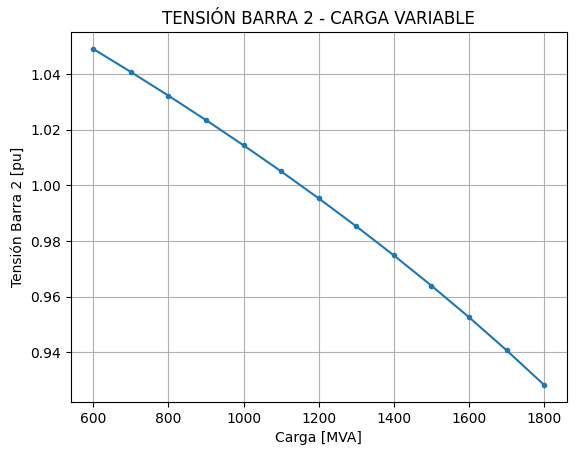

In [52]:
#A) COMPORTAMIENTO DE LA TENSIÓN PARA CARGA VARIABLE
import matplotlib.pyplot as plt
plt.plot(list(range(600,1800+1,100)), Tensiones, marker='.', linestyle='-')
plt.xlabel('Carga [MVA]')
plt.ylabel('Tensión Barra 2 [pu]')
plt.title('TENSIÓN BARRA 2 - CARGA VARIABLE')
plt.grid(True) 
plt.show()

<div style="text-align: justify;">

La gráfica obtenida de la variación de tensión en la **BARRA 2** para la carga variable conectada en el extremo receptor de la línea, muestra que a medida que el nivel de carga aumenta la tensión en el lado receptor disminuye. Esto es un resultado altamente esperable de manera teórica, puesto que con un simple análisis de la expresión para el cálculo de la potencia aparente, dada por:

$$S=V\times I^{*} \to V=\frac{S}{I^{*}}$$

Se puede determinar que al aumentar el nivel de demanda S, la corriente tambien debe aumentar y como esta es inversamente proporcional a la tensión, esta comienza a disminuir. Se ha de resaltar, que este es un hecho sumamente importante en SEP, puesto que permite dimensionar los efectos que podría provocar en los sistemas de transmisión una cantidad desproporcionada de demanda, que en un principio bajaría drásticamente las tensiones nominales de las barras de alimentación.
</div>

<div style="text-align: justify;">

Por otro lado, las tensiones de barra se encuentran muy por fuera de lo establecido por la normativa vigente (sobre todo en los extremos de la variación de carga), y por lo tanto, surge la idea del diseño de una compensación que permita normalizarlas a un valor aceptable. Para esto, se plantea una compensación simple (shunt) del tipo _capacitiva_ o _inductiva_ que logre elevar o reducir la tensión de la barra receptora respectivamente según corresponda a valores dentro de los límites estables mencionados por la normativa para el _ESTADO NORMAL_ de operación.

</div>

In [66]:
#B) Calculo de la compensación Shunt
import pandapower as pp
import math as mm

#Variables Globales
Tensiones_c = []
LineasP_c = []
Paso = 100 #MVA
Q_comp = []
#Parámetros de Línea
r1 = 0.02  #(Ohm/km)
x1 = 0.115 #(Ohm/km)
B1 = 19.1  #(nF/km)
Imax1 = 1  #(kA)
for i_c in range(600,1800+1,Paso):
    netc = pp.create_empty_network()
    #Barras
    b1_1 = pp.create_bus(netc, vn_kv=500, name="Barra 1")
    b2_1 = pp.create_bus(netc, vn_kv=500, name="Barra 2")
    #Calculo De Potencias En Carga
    FP1_c = 0.9
    P1_c = round(i_c * FP1_c, 2)
    Q1_c = round(i_c * mm.sqrt(1 - FP1_c**2), 2)
    #Elementos De Barra
    pp.create_ext_grid(netc, bus=b1_1, vm_pu=1.00, name="Fuente Externa")
    pp.create_load(netc, bus=b2_1, p_mw=P1_c, q_mvar=Q1_c, name="Carga 1")
    pp.create_line_from_parameters(netc, name='Linea 1-2_1', length_km=500, from_bus=b1_1, to_bus=b2_1,
                                   r_ohm_per_km=r1, x_ohm_per_km=x1, c_nf_per_km=B1, max_i_ka=Imax1)
    pp.create_line_from_parameters(netc, name='Linea 1-2_2', length_km=500, from_bus=b1_1, to_bus=b2_1,
                                   r_ohm_per_km=r1, x_ohm_per_km=x1, c_nf_per_km=B1, max_i_ka=Imax1)
    #Flujo De Energía
    pp.runpp(netc)
    tension_barra2_c = netc.res_bus.at[1,'vm_pu']
    #Calculo Iterativo De Compensación en Barras
    if tension_barra2_c>1.01: #Caso Sobretensión - Inductancia Shunt
        for k1 in range(100,1000,5):
            pp.create_shunt(netc, bus=b2_1, q_mvar=k1, p_mw=0, in_service=True)
            pp.runpp(netc)
            if netc.res_bus.at[1,'vm_pu']<= 1.01:
                Tensiones_c.append(netc.res_bus.at[1,'vm_pu'])
                LineasP_c.append(netc.res_line.loc[0, 'pl_mw']*2)
                Q_comp.append(k1)
                break
    elif tension_barra2_c<0.99: #Caso de Bajatensión - Capacitancia Shunt
        for k2 in range(100,1000,5):
            pp.create_shunt(netc, bus=b2_1, q_mvar=-1*k2, p_mw=0, in_service=True)
            pp.runpp(netc)
            if netc.res_bus.at[1,'vm_pu']>= 0.99:
                Tensiones_c.append(netc.res_bus.at[1,'vm_pu'])
                LineasP_c.append(netc.res_line.loc[0, 'pl_mw']*2)
                Q_comp.append(-1*k2)
                break
    elif 0.99<tension_barra2_c and tension_barra2_c<1.01:
        Tensiones_c.append(netc.res_bus.at[1,'vm_pu'])
        LineasP_c.append(netc.res_line.loc[0, 'pl_mw']*2)

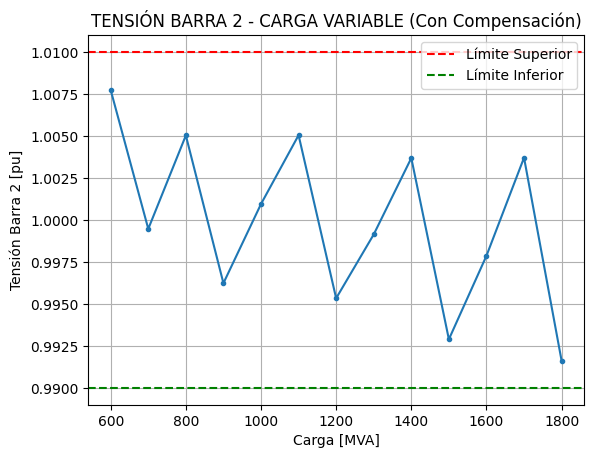

In [67]:
#Gráficas con compensación
import matplotlib.pyplot as plt
plt.plot(list(range(600,1800+1,100)), Tensiones_c, marker='.', linestyle='-')
plt.axhline(y=1.01, color='r', linestyle='--',label='Límite Superior') 
plt.axhline(y=0.99, color='g', linestyle='--',label='Límite Inferior') 
plt.xlabel('Carga [MVA]')
plt.ylabel('Tensión Barra 2 [pu]')
plt.title('TENSIÓN BARRA 2 - CARGA VARIABLE (Con Compensación)')
plt.grid(True) 
plt.legend() 
plt.show()

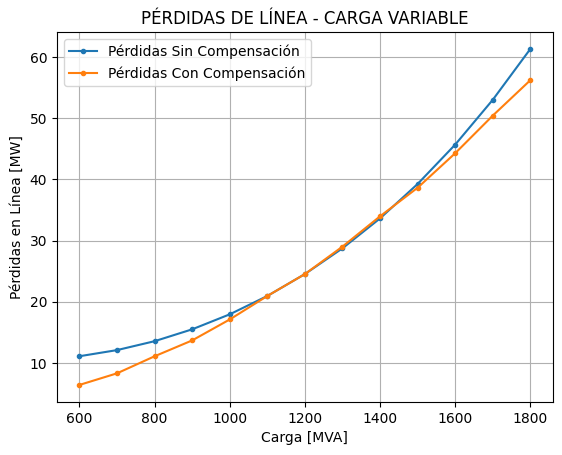

In [69]:
#C) PÉRDIDAS EN LA LÍNEA PARA EL RANGO DE POTENCIA DEMANDADA
import matplotlib.pyplot as plt
plt.plot(list(range(600,1800+1,100)), LineasP, marker='.', linestyle='-', label='Pérdidas Sin Compensación')
plt.plot(list(range(600,1800+1,100)), LineasP_c, marker='.', linestyle='-', label='Pérdidas Con Compensación')
plt.xlabel('Carga [MVA]')
plt.ylabel('Pérdidas en Línea [MW]')
plt.title('PÉRDIDAS DE LÍNEA - CARGA VARIABLE')
plt.grid(True)
plt.legend() 
plt.show()

## 3. MODELO B

En base a la información suministrada para el **Sistema B** y mostrada en la figura, se plantea el esquema con Panda Power y se realiza el flujo de carga respectivo en función de las cargas conectadas.

<div style="text-align: center;">
  <img src="IMAGENES/MODELO_B.PNG" alt="Descripción de la imagen" width="300"/>
</div>

In [ ]:
import pandapower as pp

net2 = pp.create_empty_network()
#Carga Nominal Por Barra
P2 = 150 #MW
Q2 = 100 #MVAr
#Barras
b1 = pp.create_bus(net2, vn_kv=110, name='Barra 1', slack=True)
b2 = pp.create_bus(net2, vn_kv=220, name="Barra 2")
b1A = pp.create_bus(net2, vn_kv=220, name="Barra 1A")
b2A = pp.create_bus(net2, vn_kv=220, name="Barra 2A")
b3A = pp.create_bus(net2, vn_kv=220, name="Barra 3A")
b2B = pp.create_bus(net2, vn_kv=220, name="Barra 2B")
b1B = pp.create_bus(net2, vn_kv=220, name="Barra 1B")
#Elementos De Barra
pp.create_ext_grid(net2, bus=b1, vm_pu=1.00, name="Fuente Externa")
pp.create_load(net2, bus=b1A, p_mw=P2*0.2, q_mvar=Q2*0.2, name="Carga 1A")
pp.create_load(net2, bus=b2A, p_mw=P2*0.35, q_mvar=Q2*0.35, name="Carga 2A")
pp.create_load(net2, bus=b3A, p_mw=P2*0.15, q_mvar=Q2*0.15, name="Carga 3A")
pp.create_load(net2, bus=b2B, p_mw=P2*0.6, q_mvar=Q2*0.6, name="Carga 2B")
pp.create_load(net2, bus=b1B, p_mw=P2*0.1, q_mvar=Q2*0.1, name="Carga 1B")
#Elementos De Rama
tid = pp.create_transformer(net2, hv_bus=b2, lv_bus=b1, std_type="100 MVA 220/110 kV", name="Trafo 1")
#L 2 - 1A
pp.create_line(net2, from_bus=b2, to_bus=b1A, length_km=10, name="Linea 2-1A",
               std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", in_service=True) 
#L 1A - 2A
pp.create_line(net2, from_bus=b1A, to_bus=b2A, length_km=15, name="Linea 1A-2A",
               std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", in_service=True) 
#L 2A - 3A
pp.create_line(net2, from_bus=b2A, to_bus=b3A, length_km=20, name="Linea 2A-3A",
               std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", in_service=True) 
#L 3A - 2B
pp.create_line(net2, from_bus=b3A, to_bus=b2B, length_km=15, name="Linea 3A-2B",
               std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", in_service=True) 
#L 2B - 1B
pp.create_line(net2, from_bus=b2B, to_bus=b1B, length_km=30, name="Linea 2B-1B",
               std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", in_service=True) 
#L 1B - 2
pp.create_line(net2, from_bus=b1B, to_bus=b2, length_km=10, name="Linea 1B-2",
               std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", in_service=True) 
#Flujo De Carga
pp.runpp(net2)

In [ ]:
#A) ANÁLISIS DE SATURACIÓN EN LÍNEAS
resultados_lineas = net2.res_line
import matplotlib.pyplot as plt
Line = []
Load_per = []
for n, lin in net2.line.iterrows():
    Line.append(lin['name'])
    res_line = resultados_lineas.loc[resultados_lineas.index == n]
    Load_per.append(round(res_line['loading_percent'].values[0],1))

plt.bar(Line, Load_per,color='lightblue',edgecolor='black') 
plt.ylabel('% Carga en Líneas')
plt.xticks(rotation=45) 
plt.title('Porcentaje De Cargabilidad en Líneas')
for i, valor in enumerate(Load_per):
    plt.annotate(str(valor), xy=(i, valor), ha='center', va='bottom')
plt.show()



In [ ]:
#B) Análisis de Tensiones de Barra
resultados_bus = net2.res_bus
import matplotlib.pyplot as plt
Bus = []
Voltage_pu = []
for n, lin in net2.bus.iterrows():
    Bus.append(lin['name'])
    res_bus1 = resultados_bus.loc[resultados_bus.index == n]
    Voltage_pu.append(round(res_bus1['vm_pu'].values[0],3))

plt.bar(Bus, Voltage_pu, color='lightblue',edgecolor='black') 
plt.axhline(y=0.97, color='g', linestyle='--',label='Estado Normal')  # Línea en y=15
plt.axhline(y=1.03, color='g', linestyle='--')  # Línea en y=15
plt.axhline(y=0.95, color='r', linestyle='--',label='Estado Alerta')   # Línea en y=20
plt.axhline(y=1.05, color='r', linestyle='--')   # Línea en y=20
plt.ylabel('Tensión Barra (pu)')
plt.xticks(rotation=45) 
plt.title('Tensión De Barras')
for i, valor in enumerate(Voltage_pu):
    plt.annotate(str(valor), xy=(i, valor-0.15), ha='center', va='bottom')
plt.legend() 
plt.show()


### G. Escenario De Variación De Cargas
<div style="text-align: justify;">

Puesto que las cargas no siempre mantienen su valor nominal constante (depende mucho del tipo de carga y su uso), se analiza el caso en el que las cargas conectadas a las barras del **Sistema B** varían de forma independiente $\pm 15\%$ de la potencia consumida. De esta manera, puesto que existen cinco cargas, se analizan cinco escenarios posibles y los cambios que su variación provoca en las variables principales del sistema.

</div>

In [ ]:
import pandapower as pp
import math as mt
import numpy as np
import pickle

date_voltage = {}  #Almacenador de tensiones en barra
date_s = []        #Almacenador de potencia actual dentro del bucle for
date_line = {}     #Almacenador de cargabilidad de líneas
#Carga Nominal Por Barra
Pc = 0.1 #Porcentaje en Carga (varía)
P2 = 150 #MW
Q2 = 100 #MVAr
S2 = mt.sqrt(P2**2 + Q2**2)
FPc = round(P2/S2,2) #Supuesto: Asumiremos que dentro del 15% de variación, FP se mantiene constante (Para todas las cargas)
#Variables De Interés
S_min = round(mt.sqrt((P2*Pc-P2*Pc*0.15)**2 + (Q2*Pc-Q2*Pc*0.15)**2),1)
S_max = round(mt.sqrt((P2*Pc+P2*Pc*0.15)**2 + (Q2*Pc+Q2*Pc*0.15)**2),1)
Paso2 = 0.1
for k in np.arange(S_min,S_max+0.1,Paso2): 
    net3 = pp.create_empty_network()
    P_load = round(k * FPc, 2)
    Q_load = round(k * mm.sqrt(1 - FPc**2), 2)
    #Barras
    b1 = pp.create_bus(net3, vn_kv=110, name='Barra 1', slack=True)
    b2 = pp.create_bus(net3, vn_kv=220, name="Barra 2")
    b1A = pp.create_bus(net3, vn_kv=220, name="Barra 1A")
    b2A = pp.create_bus(net3, vn_kv=220, name="Barra 2A")
    b3A = pp.create_bus(net3, vn_kv=220, name="Barra 3A")
    b2B = pp.create_bus(net3, vn_kv=220, name="Barra 2B")
    b1B = pp.create_bus(net3, vn_kv=220, name="Barra 1B")
    #Elementos De Barra
    pp.create_ext_grid(net3, bus=b1, vm_pu=1.00, name="Fuente Externa")
    pp.create_load(net3, bus=b1A, p_mw=P2*0.2, q_mvar=Q2*0.2, name="Carga 1A")
    pp.create_load(net3, bus=b2A, p_mw=P2*0.35, q_mvar=Q2*0.35, name="Carga 2A")
    pp.create_load(net3, bus=b3A, p_mw=P2*0.15, q_mvar=Q2*0.15, name="Carga 3A")
    pp.create_load(net3, bus=b2B, p_mw=P2*0.6, q_mvar=Q2*0.6, name="Carga 2B")
    pp.create_load(net3, bus=b1B, p_mw=P_load, q_mvar=Q_load, name="Carga 1B")
    #Elementos De Rama
    tid = pp.create_transformer(net3, hv_bus=b2, lv_bus=b1, std_type="100 MVA 220/110 kV", name="Trafo 1")
    #L 2 - 1A
    pp.create_line(net3, from_bus=b2, to_bus=b1A, length_km=10, name="Linea 2-1A", std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", in_service=True) 
    #L 1A - 2A
    pp.create_line(net3, from_bus=b1A, to_bus=b2A, length_km=15, name="Linea 1A-2A", std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", in_service=True) 
    #L 2A - 3A
    pp.create_line(net3, from_bus=b2A, to_bus=b3A, length_km=20, name="Linea 2A-3A", std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", in_service=True) 
    #L 3A - 2B
    pp.create_line(net3, from_bus=b3A, to_bus=b2B, length_km=15, name="Linea 3A-2B", std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", in_service=True) 
    #L 2B - 1B
    pp.create_line(net3, from_bus=b2B, to_bus=b1B, length_km=30, name="Linea 2B-1B", std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", in_service=True) 
    #L 1B - 2
    pp.create_line(net3, from_bus=b1B, to_bus=b2, length_km=10, name="Linea 1B-2", std_type="N2XS(FL)2Y 1x185 RM/35 64/110 kV", in_service=True) 
    #Flujo De Carga
    pp.runpp(net3)
    date_s.append("{:.1f}".format(k))
    v_name = []
    v_value = []
    l_name = []
    l_value = []
    for z, x in net3.bus.iterrows():
        v_name.append(x['name'])
        res_bus0 = net3.res_bus.loc[net3.res_bus.index == z]
        v_value.append(round(res_bus1['vm_pu'].values[0],3))
    date_voltage[str("{:.1f}".format(k))] = (v_name,v_value)
    for h, f in net3.line.iterrows():
        l_name.append(f['name'])
        res_line0 = net3.res_line.loc[net3.res_line.index == h]
        l_value.append(round(res_line['loading_percent'].values[0],1))
    date_voltage[str("{:.1f}".format(k))] = (v_name,v_value)
    date_line[str("{:.1f}".format(k))] = (l_name,l_value)
date_s = [float(numero) for numero in date_s]
#GUARDADO DE SIMULACIONES POR VARIABLE
with open('SIMULACIONES/carga1B_potS.pkl', 'wb') as f:
    pickle.dump(date_s, f)
with open('SIMULACIONES/carga1B_bus.pkl', 'wb') as f:
    pickle.dump(date_voltage, f)
with open('SIMULACIONES/carga1B_line.pkl', 'wb') as f:
    pickle.dump(date_line, f)


**1. Carga de la Barra 1A**

In [ ]:
import pickle
import matplotlib.pyplot as plt
#Se cargan archivos Simulados
with open('SIMULACIONES/carga1A_potS.pkl', 'rb') as f:
    S_1A = pickle.load(f)
with open('SIMULACIONES/carga1A_bus.pkl', 'rb') as f:
    BUS_1A = pickle.load(f)
with open('SIMULACIONES/carga1A_line.pkl', 'rb') as f:
    LINE_1A = pickle.load(f)
#GRAFICO DE TENSIONES EN BARRA
Bus_p1A = []
Voltage_p1A = []
contx = 1
for llave1 in BUS_1A.keys():
    a,b = BUS_1A[llave1]
    if contx == 1:
        Bus_p1A = a
    Voltage_p1A.append(b)
    contx = contx + 1
for u in Bus_p1A:
    voltage_temp = []
    num_bar = Bus_p1A.index(u)
    for b in Voltage_p1A:
        voltage_temp.append(b[num_bar])
    plt.plot(S_1A, voltage_temp, marker='.', linestyle='-', label=u)
plt.title('Tensiones en Barra - Carga Variable 1A')
plt.xlabel('Variabilidad Carga Barra 1A (MVA)')
plt.ylabel('Tensiones en Barra (pu)')
plt.ylim(1, 1.06)
plt.grid(True)
plt.legend() 
plt.show()
#GRAFICO DE CARGABILIDAD DE LÍNEA
Line_p1A = []
Carg_p1A = []
contx = 1
for llave2 in LINE_1A.keys():
    a,b = LINE_1A[llave2]
    if contx == 1:
        Line_p1A = a
    Carg_p1A.append(b)
    contx = contx + 1
for u in Line_p1A:
    carga_temp = []
    num_line = Line_p1A.index(u)
    for b in Carg_p1A:
        carga_temp.append(b[num_line])
    plt.plot(S_1A, carga_temp, marker='.', linestyle='-', label=u)
plt.title('Cargabilidad de Líneas - Carga Variable 1A')
plt.xlabel('Variabilidad Carga Barra 1A (MVA)')
plt.ylabel('Cargabilidad Línea (%)')
#plt.ylim(1, 1.06)
plt.grid(True)
plt.legend() 
plt.show()

**2. Carga de la Barra 2A**

In [ ]:
import pickle
import matplotlib.pyplot as plt
#Se cargan archivos Simulados
with open('SIMULACIONES/carga2A_potS.pkl', 'rb') as f:
    S_1A = pickle.load(f)
with open('SIMULACIONES/carga2A_bus.pkl', 'rb') as f:
    BUS_1A = pickle.load(f)
with open('SIMULACIONES/carga2A_line.pkl', 'rb') as f:
    LINE_1A = pickle.load(f)
#GRAFICO DE TENSIONES EN BARRA
Bus_p1A = []
Voltage_p1A = []
contx = 1
for llave1 in BUS_1A.keys():
    a,b = BUS_1A[llave1]
    if contx == 1:
        Bus_p1A = a
    Voltage_p1A.append(b)
    contx = contx + 1
for u in Bus_p1A:
    voltage_temp = []
    num_bar = Bus_p1A.index(u)
    for b in Voltage_p1A:
        voltage_temp.append(b[num_bar])
    plt.plot(S_1A, voltage_temp, marker='.', linestyle='-', label=u)
plt.title('Tensiones en Barra - Carga Variable 1A')
plt.xlabel('Variabilidad Carga Barra 1A (MVA)')
plt.ylabel('Tensiones en Barra (pu)')
plt.ylim(1, 1.06)
plt.grid(True)
plt.legend() 
plt.show()
#GRAFICO DE CARGABILIDAD DE LÍNEA
Line_p1A = []
Carg_p1A = []
contx = 1
for llave2 in LINE_1A.keys():
    a,b = LINE_1A[llave2]
    if contx == 1:
        Line_p1A = a
    Carg_p1A.append(b)
    contx = contx + 1
for u in Line_p1A:
    carga_temp = []
    num_line = Line_p1A.index(u)
    for b in Carg_p1A:
        carga_temp.append(b[num_line])
    plt.plot(S_1A, carga_temp, marker='.', linestyle='-', label=u)
plt.title('Cargabilidad de Líneas - Carga Variable 1A')
plt.xlabel('Variabilidad Carga Barra 1A (MVA)')
plt.ylabel('Cargabilidad Línea (%)')
#plt.ylim(1, 1.06)
plt.grid(True)
plt.legend() 
plt.show()

**3. Carga de la Barra 3A**

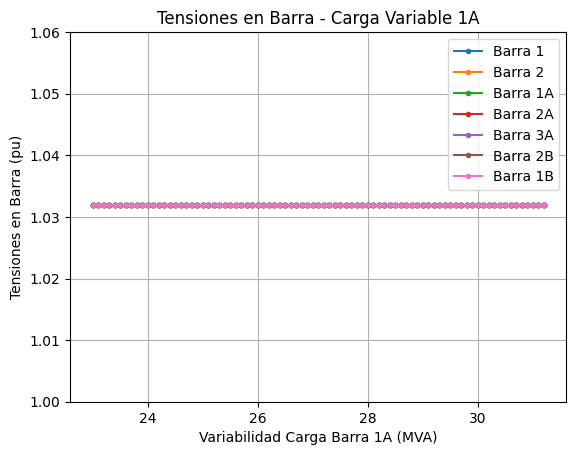

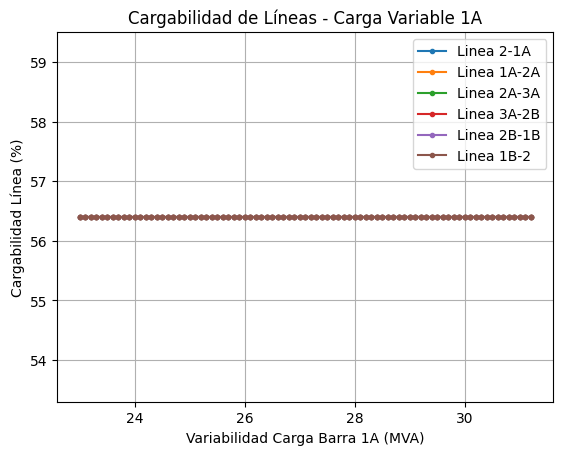

In [1]:
import pickle
import matplotlib.pyplot as plt
#Se cargan archivos Simulados
with open('SIMULACIONES/carga3A_potS.pkl', 'rb') as f:
    S_1A = pickle.load(f)
with open('SIMULACIONES/carga3A_bus.pkl', 'rb') as f:
    BUS_1A = pickle.load(f)
with open('SIMULACIONES/carga3A_line.pkl', 'rb') as f:
    LINE_1A = pickle.load(f)
#GRAFICO DE TENSIONES EN BARRA
Bus_p1A = []
Voltage_p1A = []
contx = 1
for llave1 in BUS_1A.keys():
    a,b = BUS_1A[llave1]
    if contx == 1:
        Bus_p1A = a
    Voltage_p1A.append(b)
    contx = contx + 1
for u in Bus_p1A:
    voltage_temp = []
    num_bar = Bus_p1A.index(u)
    for b in Voltage_p1A:
        voltage_temp.append(b[num_bar])
    plt.plot(S_1A, voltage_temp, marker='.', linestyle='-', label=u)
plt.title('Tensiones en Barra - Carga Variable 1A')
plt.xlabel('Variabilidad Carga Barra 1A (MVA)')
plt.ylabel('Tensiones en Barra (pu)')
plt.ylim(1, 1.06)
plt.grid(True)
plt.legend() 
plt.show()
#GRAFICO DE CARGABILIDAD DE LÍNEA
Line_p1A = []
Carg_p1A = []
contx = 1
for llave2 in LINE_1A.keys():
    a,b = LINE_1A[llave2]
    if contx == 1:
        Line_p1A = a
    Carg_p1A.append(b)
    contx = contx + 1
for u in Line_p1A:
    carga_temp = []
    num_line = Line_p1A.index(u)
    for b in Carg_p1A:
        carga_temp.append(b[num_line])
    plt.plot(S_1A, carga_temp, marker='.', linestyle='-', label=u)
plt.title('Cargabilidad de Líneas - Carga Variable 1A')
plt.xlabel('Variabilidad Carga Barra 1A (MVA)')
plt.ylabel('Cargabilidad Línea (%)')
#plt.ylim(1, 1.06)
plt.grid(True)
plt.legend() 
plt.show()

**4. Carga de la Barra 2B**

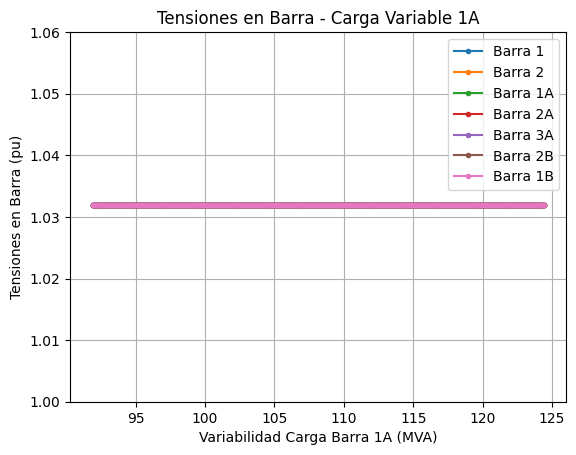

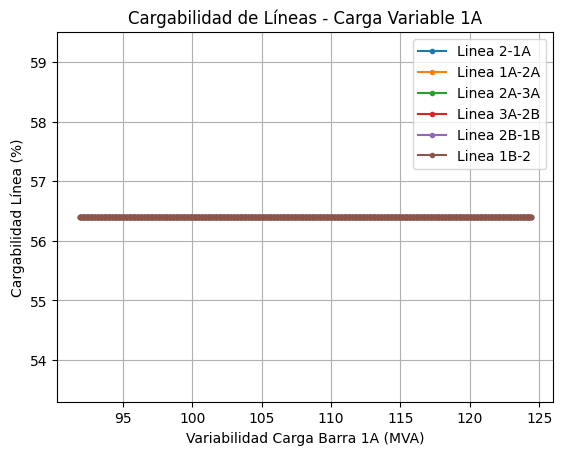

In [214]:
import pickle
import matplotlib.pyplot as plt
#Se cargan archivos Simulados
with open('SIMULACIONES/carga2B_potS.pkl', 'rb') as f:
    S_1A = pickle.load(f)
with open('SIMULACIONES/carga2B_bus.pkl', 'rb') as f:
    BUS_1A = pickle.load(f)
with open('SIMULACIONES/carga2B_line.pkl', 'rb') as f:
    LINE_1A = pickle.load(f)
#GRAFICO DE TENSIONES EN BARRA
Bus_p1A = []
Voltage_p1A = []
contx = 1
for llave1 in BUS_1A.keys():
    a,b = BUS_1A[llave1]
    if contx == 1:
        Bus_p1A = a
    Voltage_p1A.append(b)
    contx = contx + 1
for u in Bus_p1A:
    voltage_temp = []
    num_bar = Bus_p1A.index(u)
    for b in Voltage_p1A:
        voltage_temp.append(b[num_bar])
    plt.plot(S_1A, voltage_temp, marker='.', linestyle='-', label=u)
plt.title('Tensiones en Barra - Carga Variable 1A')
plt.xlabel('Variabilidad Carga Barra 1A (MVA)')
plt.ylabel('Tensiones en Barra (pu)')
plt.ylim(1, 1.06)
plt.grid(True)
plt.legend() 
plt.show()
#GRAFICO DE CARGABILIDAD DE LÍNEA
Line_p1A = []
Carg_p1A = []
contx = 1
for llave2 in LINE_1A.keys():
    a,b = LINE_1A[llave2]
    if contx == 1:
        Line_p1A = a
    Carg_p1A.append(b)
    contx = contx + 1
for u in Line_p1A:
    carga_temp = []
    num_line = Line_p1A.index(u)
    for b in Carg_p1A:
        carga_temp.append(b[num_line])
    plt.plot(S_1A, carga_temp, marker='.', linestyle='-', label=u)
plt.title('Cargabilidad de Líneas - Carga Variable 1A')
plt.xlabel('Variabilidad Carga Barra 1A (MVA)')
plt.ylabel('Cargabilidad Línea (%)')
#plt.ylim(1, 1.06)
plt.grid(True)
plt.legend() 
plt.show()

**5. Carga de la Barra 1B**

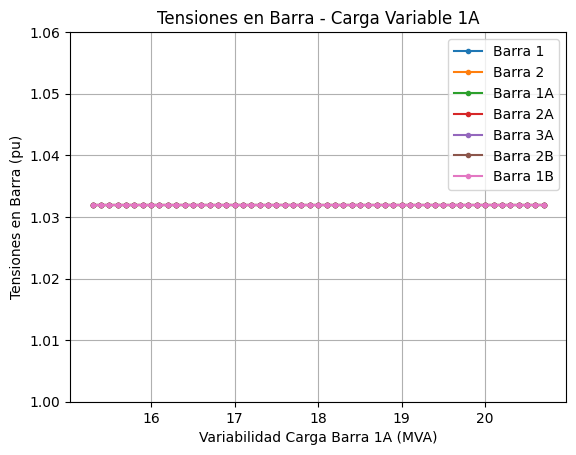

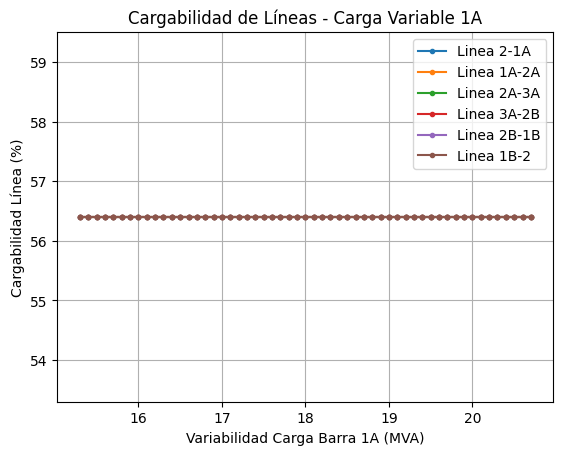

In [213]:
import pickle
import matplotlib.pyplot as plt
#Se cargan archivos Simulados
with open('SIMULACIONES/carga1B_potS.pkl', 'rb') as f:
    S_1A = pickle.load(f)
with open('SIMULACIONES/carga1B_bus.pkl', 'rb') as f:
    BUS_1A = pickle.load(f)
with open('SIMULACIONES/carga1B_line.pkl', 'rb') as f:
    LINE_1A = pickle.load(f)
#GRAFICO DE TENSIONES EN BARRA
Bus_p1A = []
Voltage_p1A = []
contx = 1
for llave1 in BUS_1A.keys():
    a,b = BUS_1A[llave1]
    if contx == 1:
        Bus_p1A = a
    Voltage_p1A.append(b)
    contx = contx + 1
for u in Bus_p1A:
    voltage_temp = []
    num_bar = Bus_p1A.index(u)
    for b in Voltage_p1A:
        voltage_temp.append(b[num_bar])
    plt.plot(S_1A, voltage_temp, marker='.', linestyle='-', label=u)
plt.title('Tensiones en Barra - Carga Variable 1A')
plt.xlabel('Variabilidad Carga Barra 1A (MVA)')
plt.ylabel('Tensiones en Barra (pu)')
plt.ylim(1, 1.06)
plt.grid(True)
plt.legend() 
plt.show()
#GRAFICO DE CARGABILIDAD DE LÍNEA
Line_p1A = []
Carg_p1A = []
contx = 1
for llave2 in LINE_1A.keys():
    a,b = LINE_1A[llave2]
    if contx == 1:
        Line_p1A = a
    Carg_p1A.append(b)
    contx = contx + 1
for u in Line_p1A:
    carga_temp = []
    num_line = Line_p1A.index(u)
    for b in Carg_p1A:
        carga_temp.append(b[num_line])
    plt.plot(S_1A, carga_temp, marker='.', linestyle='-', label=u)
plt.title('Cargabilidad de Líneas - Carga Variable 1A')
plt.xlabel('Variabilidad Carga Barra 1A (MVA)')
plt.ylabel('Cargabilidad Línea (%)')
#plt.ylim(1, 1.06)
plt.grid(True)
plt.legend() 
plt.show()

## Referencias

[1] Norma Técnica De Calidad y Seguridad de Servicio. Extraída desde página web: https://www.cne.cl/normativas/electrica/normas-tecnicas/ 
